# Ensemble Techniques Project
## Data Description & Context:

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician
### Domain:
Medicine

## Attribute Information:

- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)

### Learning Outcomes:
● Exploratory Data Analysis
● Supervised Learning
● Ensemble Learning

## Objective:
Goal is to classify the patients into the respective labels using the attributes from
their voice recordings
Steps and tasks:
1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)
3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points)
5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)
6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points)
7. Train a meta-classifier and note the accuracy on test data (10 points)
8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)
9. Compare all the models (minimum 5) and pick the best one among them (10 points)

# 1. Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split

C:\Users\amenaria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\amenaria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('Data - Parkinsons')
data.shape

(195, 24)

# 2. Exploratory Data Analysis (5 points)
It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)

In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## Comments
- The dataset has only 195 records, which is quite low and may be a challenge in creating a good predictive model
- The dataset has 24 attributes, out of which one is name and all others are numerical
- There are no missing values or zero/invalid values.
- Name column can be dropped as it is unique for each record and doesn't impact the prediction
- Target variable is 'status'

In [6]:
data.drop('name', axis=1, inplace=True)


# 3. Univariate and Bivariate analysis (15 points)
Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)

In [7]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


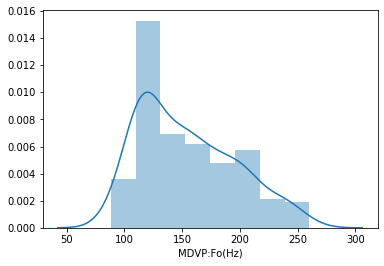

In [8]:
sns.distplot(data['MDVP:Fo(Hz)'])

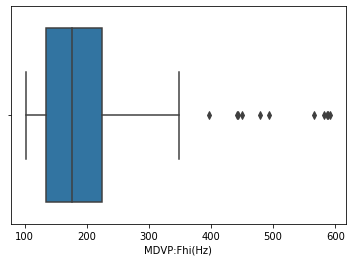

In [9]:
sns.boxplot(data['MDVP:Fhi(Hz)'])

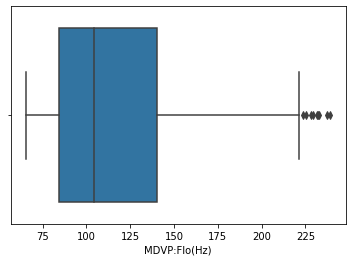

In [10]:
sns.boxplot(data['MDVP:Flo(Hz)'])

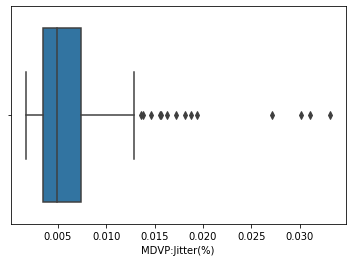

In [11]:
sns.boxplot(data['MDVP:Jitter(%)'])

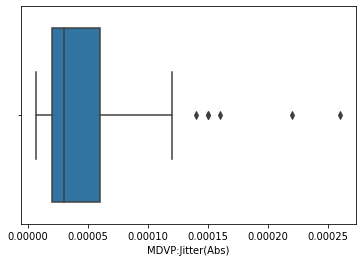

In [12]:
sns.boxplot(data['MDVP:Jitter(Abs)'])

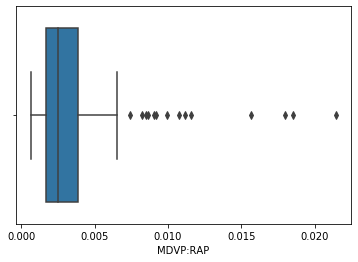

In [13]:
sns.boxplot(data['MDVP:RAP'])

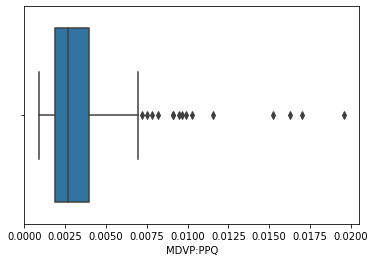

In [14]:
sns.boxplot(data['MDVP:PPQ'])

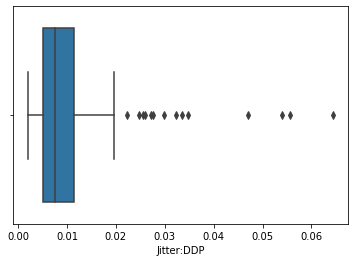

In [15]:
sns.boxplot(data['Jitter:DDP'])

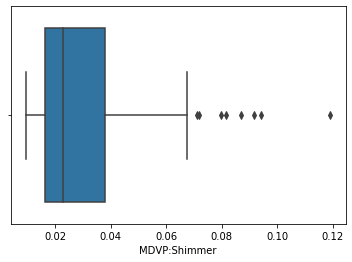

In [16]:
sns.boxplot(data['MDVP:Shimmer'])

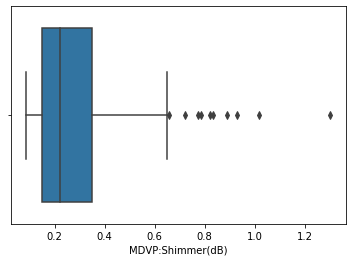

In [17]:
sns.boxplot(data['MDVP:Shimmer(dB)'])

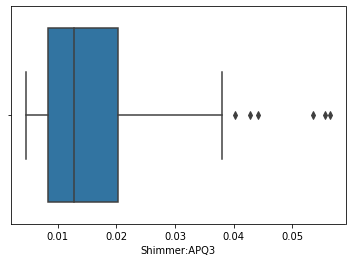

In [18]:
sns.boxplot(data['Shimmer:APQ3'])

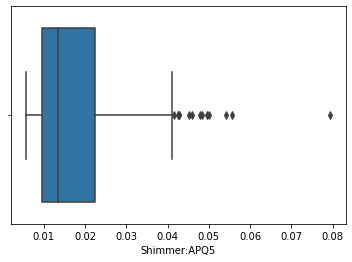

In [19]:
sns.boxplot(data['Shimmer:APQ5'])

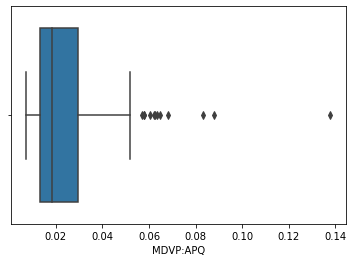

In [20]:
sns.boxplot(data['MDVP:APQ'])

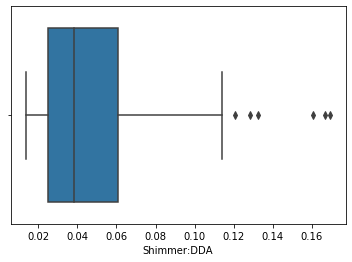

In [21]:
sns.boxplot(data['Shimmer:DDA'])

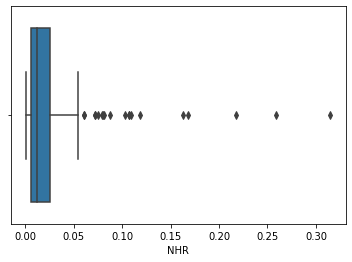

In [22]:
sns.boxplot(data['NHR'])

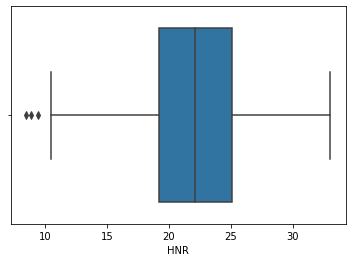

In [23]:
sns.boxplot(data['HNR'])

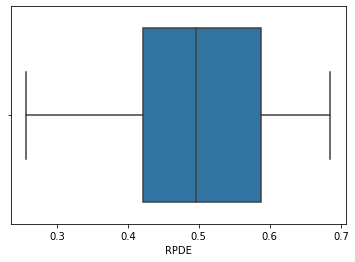

In [24]:
sns.boxplot(data['RPDE'])

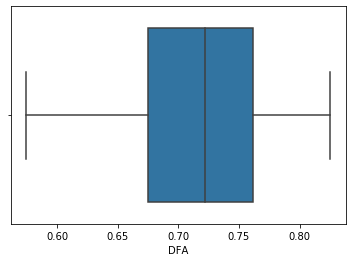

In [25]:
sns.boxplot(data['DFA'])

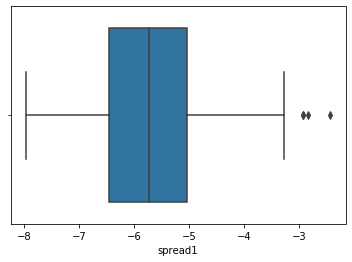

In [26]:
sns.boxplot(data['spread1'])

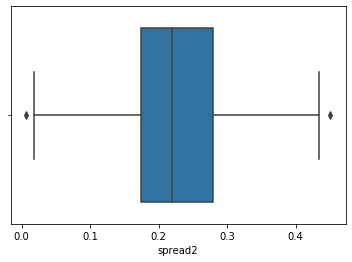

In [27]:
sns.boxplot(data['spread2'])

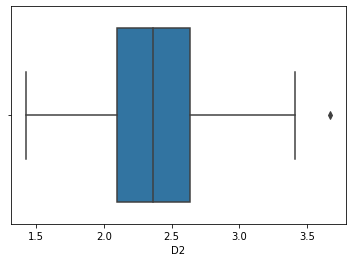

In [28]:
sns.boxplot(data['D2'])

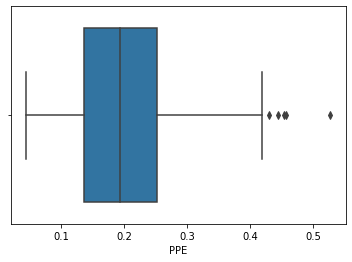

In [29]:
sns.boxplot(data['PPE'])

#### Target varriable = Status
Health status of the subject 
- 1 (one) - Parkinson's
- 0 (zero) - healthy

Majority class is the ones who have Parkinson's disease. Whereas the ones who are healthy are minority class.

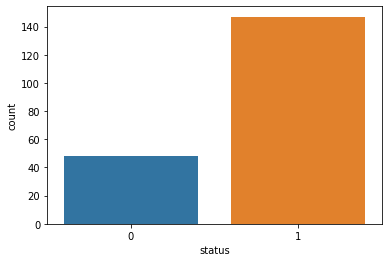

In [30]:
sns.countplot(data['status'])

#### Correlation Analysis:

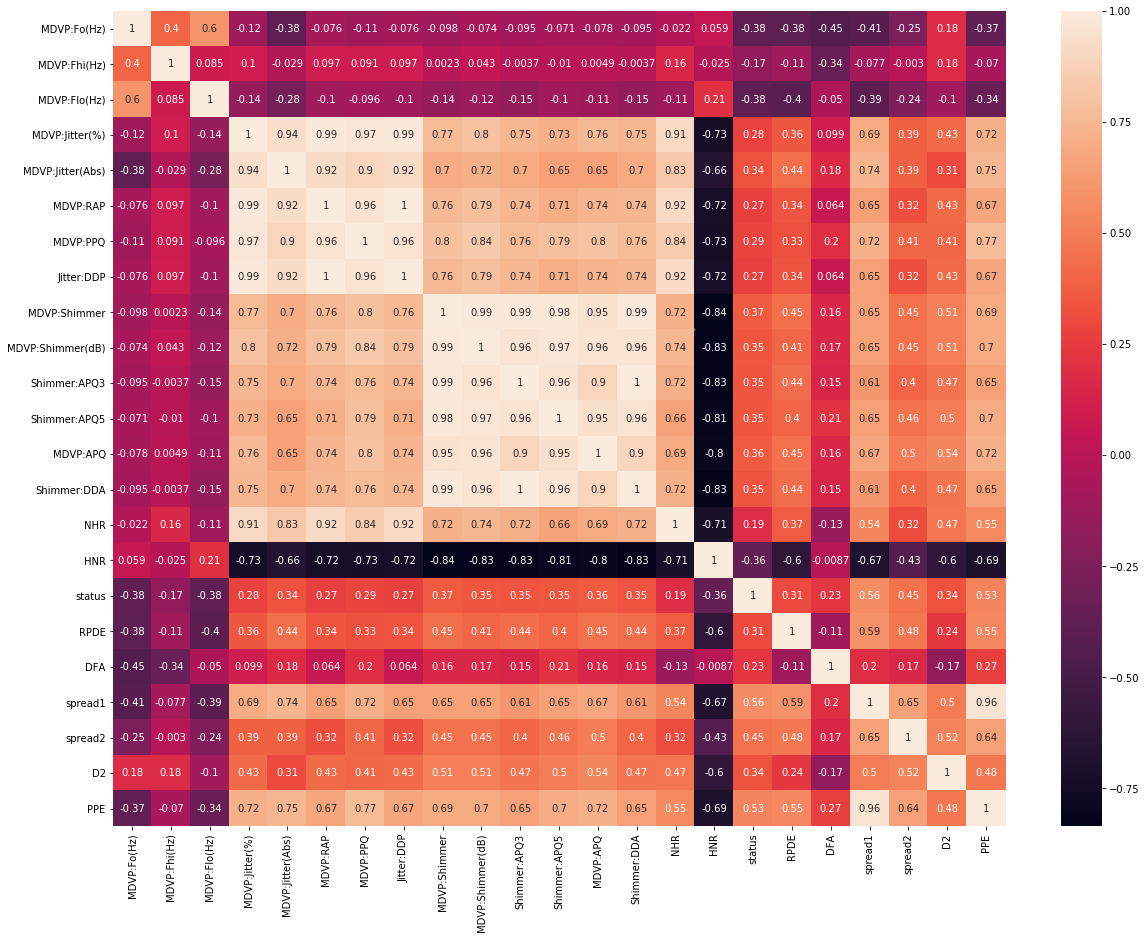

In [31]:
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True);

## Observations
- 15 out of the 22 attributes are Right skewed with lots of outliers
- Lot of attributes are correlated to each other with high Multicollinearity (corr>0.8)
- These attributes may impact the prediction and we need to treat/remove them

### Multicollinearity treatment
- To be a little cautious here, we drop only the attributes with Multicollinearity > 0.9. 
- The code loops through the items in corr and checks the items which have corr value > 0.9. 
- To ensure negative correlation is treated the same way, absolute values of corr are considered for the if condition
- The columns to be dropped are stored in drop_col

In [32]:
drop_col = []
col = data.columns
for i in range(len(corr.columns)):
    for j in range(i):
        if(abs(corr.iloc[i,j])>= 0.9 and corr.columns[j] not in drop_col):
            dropcolname = corr.columns[i]
            drop_col.append(dropcolname)
            if dropcolname in data.columns:
                data.drop(dropcolname, axis=1, inplace=True)
print('The columns which have been dropped to avoid multicollinearity are - \n', drop_col, '\n')
data.info()

The columns which have been dropped to avoid multicollinearity are - 
 ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'PPE'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MDVP:Fo(Hz)     195 non-null    float64
 1   MDVP:Fhi(Hz)    195 non-null    float64
 2   MDVP:Flo(Hz)    195 non-null    float64
 3   MDVP:Jitter(%)  195 non-null    float64
 4   MDVP:Shimmer    195 non-null    float64
 5   HNR             195 non-null    float64
 6   status          195 non-null    int64  
 7   RPDE            195 non-null    float64
 8   DFA             195 non-null    float64
 9   spread1         195 non-null    float64
 10  spread2         195 non-null    float64
 11  D2              195 non-null    float64
dtypes: float64(11), int64(1)
memory usa

### Updated dataset and correlation

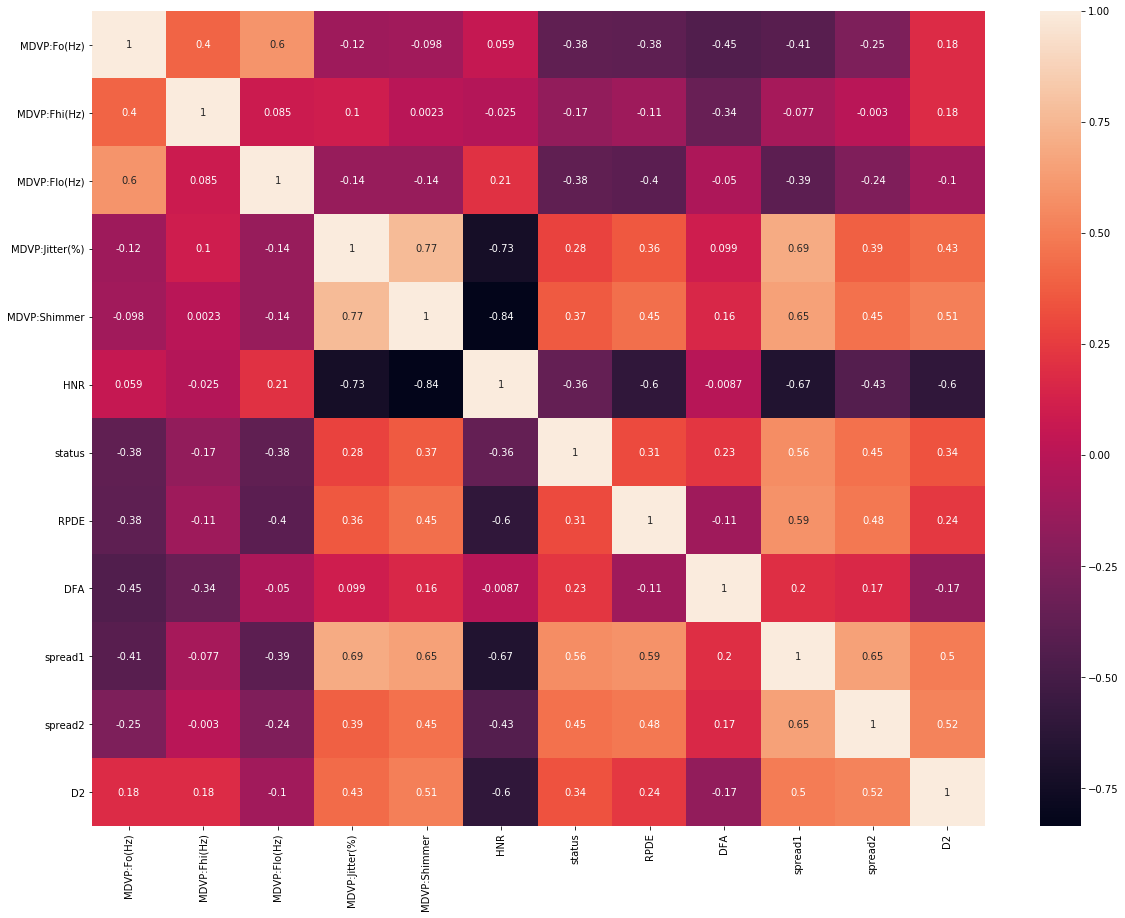

In [33]:
corr_updated = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_updated, annot=True);

In [34]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [35]:
# After multicollinearity treatment, here we have reduced the number of columns from 24 to 11.
data.shape

(195, 12)

# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points)

In [36]:
# First splitting the data into X and y (explainatory and dependent variables)
X = data.drop('status', axis=1)
y = data.pop('status')
print(y.head())
X.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [38]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
49,122.964,130.049,114.676,0.00428,0.01681,24.971,0.538688,0.754073,-6.482096,0.264967,2.054419
180,150.440,163.441,144.736,0.00396,0.02551,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226
102,139.224,586.567,66.157,0.03011,0.09419,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917
151,192.818,224.429,168.793,0.03107,0.11908,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221
91,151.955,163.335,147.226,0.00419,0.07959,19.664,0.501037,0.714360,-6.411497,0.207156,2.344876


In [39]:
y_train.head(5)

49     0
180    1
102    1
151    1
91     1
Name: status, dtype: int64

# 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)

In [40]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
cols = X_train.columns

In [41]:
# Using Standard Scaler for scaling the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = cols

X_train_scaled.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
0,-0.798033,-0.753065,-0.025548,-0.362352,-0.637785,0.672008,0.412992,0.716755,-0.708995,0.487025,-0.844546
1,-0.077503,-0.367799,0.695064,-0.423919,-0.185007,0.268114,-1.337487,0.816715,-0.505757,-0.516191,-0.310322
2,-0.371631,4.514088,-1.188668,4.607198,3.389341,-2.510364,0.954922,-1.429421,2.250106,0.556656,0.776144
3,1.033817,0.335860,1.271769,4.791897,4.684704,-2.960406,1.232154,0.988173,3.019636,2.763784,1.764867
4,-0.037774,-0.369022,0.754755,-0.379668,2.629506,-0.494188,0.059207,-0.039812,-0.643967,-0.222426,-0.104966


In [42]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_test_scaled.columns = cols

X_test_scaled.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
count,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,59.000000,5.900000e+01,5.900000e+01
mean,2.013455e-16,-1.712378e-16,2.474480e-16,-1.693561e-17,-3.104861e-16,-8.655976e-17,3.838737e-16,-1.187374e-15,0.000000,-1.994638e-16,-1.919369e-16
std,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584,1.008584e+00,1.008584e+00
min,-1.421550e+00,-9.817922e-01,-1.109112e+00,-1.162901e+00,-1.108521e+00,-2.318543e+00,-2.598855e+00,-2.289361e+00,-1.981999,-2.423338e+00,-1.534321e+00
25%,-8.350182e-01,-6.945023e-01,-6.803510e-01,-7.431543e-01,-7.910239e-01,-5.862954e-01,-6.184192e-01,-7.311349e-01,-0.633930,-6.753763e-01,-8.736352e-01
50%,-1.689367e-01,-2.810451e-01,-3.038451e-01,-2.975769e-01,-3.783056e-01,2.075948e-05,-1.860469e-01,-1.619621e-02,0.025126,-8.763007e-02,8.905679e-03
75%,8.059642e-01,3.451978e-01,2.537469e-01,3.636857e-01,5.054468e-01,7.493590e-01,8.763762e-01,7.865154e-01,0.933651,8.050990e-01,5.677209e-01
max,2.179097e+00,3.766264e+00,2.581974e+00,3.360032e+00,2.830473e+00,2.427103e+00,1.584157e+00,1.700479e+00,2.133121,2.132959e+00,2.932791e+00


In [43]:
# There are no missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MDVP:Fo(Hz)     195 non-null    float64
 1   MDVP:Fhi(Hz)    195 non-null    float64
 2   MDVP:Flo(Hz)    195 non-null    float64
 3   MDVP:Jitter(%)  195 non-null    float64
 4   MDVP:Shimmer    195 non-null    float64
 5   HNR             195 non-null    float64
 6   RPDE            195 non-null    float64
 7   DFA             195 non-null    float64
 8   spread1         195 non-null    float64
 9   spread2         195 non-null    float64
 10  D2              195 non-null    float64
dtypes: float64(11)
memory usage: 16.9 KB


# 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points)

Using Logistic Regression, SVM and KNN as base models 

## (1) Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train)
y_pred_logit = logit.predict(X_test_scaled)

C:\Users\amenaria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [47]:
print('Logistic Regression Training Accuracy:',logit.score(X_train_scaled, y_train)*100, '%')
cm_logit = confusion_matrix(y_test, y_pred_logit, labels=[1,0])
print('Confusion Matrix \n', cm_logit)
print('Logistic Regression Testing Accuracy:',logit.score(X_test_scaled, y_test)*100, '%')

Logistic Regression Training Accuracy: 86.02941176470588 %
Confusion Matrix 
 [[42  1]
 [ 5 11]]
Logistic Regression Testing Accuracy: 89.83050847457628 %


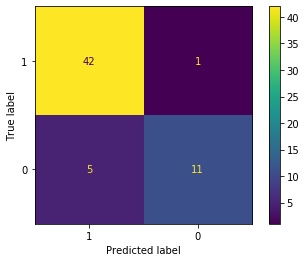

In [48]:
plot_confusion_matrix(logit, X_test_scaled, y_test, labels=[1,0], display_labels=[1,0])

## (2) Support Vector Machine

In [49]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [50]:
print('SVM Training Accuracy:',svm.score(X_train_scaled, y_train)*100, '%')
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=[1,0])
print('Confusion Matrix \n', cm_svm)
print('SVM Testing Accuracy:',svm.score(X_test_scaled, y_test)*100, '%')

SVM Training Accuracy: 88.97058823529412 %
Confusion Matrix 
 [[43  0]
 [10  6]]
SVM Testing Accuracy: 83.05084745762711 %


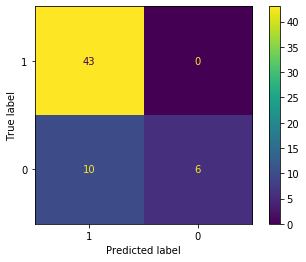

In [51]:
plot_confusion_matrix(svm, X_test_scaled, y_test, labels=[1,0], display_labels=[1,0])

## (3) K-Nearest Neighbor

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

C:\Users\amenaria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\amenaria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [53]:
print('KNN Training Accuracy:',knn.score(X_train_scaled, y_train)*100, '%')
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=[1,0])
print('Confusion Matrix \n', cm_knn)
print('KNN Testing Accuracy:',knn.score(X_test_scaled, y_test)*100, '%')

KNN Training Accuracy: 92.64705882352942 %
Confusion Matrix 
 [[40  3]
 [ 5 11]]
KNN Testing Accuracy: 86.4406779661017 %


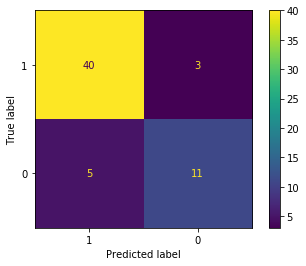

In [54]:
plot_confusion_matrix(knn, X_test_scaled, y_test, labels=[1,0], display_labels=[1,0])

In [55]:
print('Logistic Regression Testing Accuracy:',logit.score(X_test_scaled, y_test)*100, '%')
print('SVM Testing Accuracy:',svm.score(X_test_scaled, y_test)*100, '%')
print('KNN Testing Accuracy:',knn.score(X_test_scaled, y_test)*100, '%')

Logistic Regression Testing Accuracy: 89.83050847457628 %
SVM Testing Accuracy: 83.05084745762711 %
KNN Testing Accuracy: 86.4406779661017 %


## Result:
From the initial prediction using standard classification algorithms, <b>Logistic Regression</b> has the best perfromance based on overall accuracy of 89.83% on the Test data

# 7. Train a meta-classifier and note the accuracy on test data (10 points)

- Using Decision Tree as the Meta Classifier &
- Using MLxtend Stacking Classifier to stack the meta classifier over the base models used in the previous code

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from mlxtend.classifier import StackingClassifier

# Limiting max depth to avoid overfitting
dtcl = DecisionTreeClassifier(max_depth=4, random_state=1)
stcl = StackingClassifier(classifiers=[logit, svm, knn], meta_classifier=dtcl)

C:\Users\amenaria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


There are multiple options to stack the Meta-classifier with the Base classifiers. 3 of them are evaluated here - 

### (1) Using Simple Stacked classification

In [57]:
# Using Simple Stacked classification
for clf, label in zip([logit, svm, knn, stcl], ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 'StackingClassifier']):
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
    print('Accuracy: %0.2f %0.2f [%s]' % (scores.mean(), scores.std(), label))


Accuracy: 0.79 0.04 [Logistic Regression]
Accuracy: 0.85 0.03 [Support Vector Machine]
Accuracy: 0.88 0.05 [K-Nearest Neighbor]
Accuracy: 0.88 0.04 [StackingClassifier]


In [58]:
stcl.fit(X_train_scaled, y_train)
y_pred_stcl = stcl.predict(X_test_scaled)

In [59]:
print('Metaclassifier Training Accuracy:',stcl.score(X_train_scaled, y_train)*100, '%')
cm_stcl = confusion_matrix(y_test, y_pred_stcl, labels=[1,0])
print('Confusion Matrix \n', cm_stcl)
print('Metaclassifier Testing Accuracy:',stcl.score(X_test_scaled, y_test)*100, '%')

Metaclassifier Training Accuracy: 94.11764705882352 %
Confusion Matrix 
 [[40  3]
 [ 5 11]]
Metaclassifier Testing Accuracy: 86.4406779661017 %


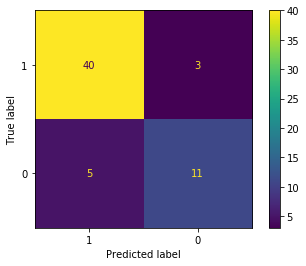

In [60]:
plot_confusion_matrix(stcl, X_test_scaled, y_test, labels=[1,0], display_labels=[1,0])

### (2) Using Probabilities as Meta-features

Using Probability values generated by the base models as Meta-features for the meta classifier


In [61]:
# Using Probability values generated by the base models as Meta-features for the meta classifier
svm = SVC(probability=True)
stcl1 = StackingClassifier(classifiers=[logit, svm, knn], use_probas=True, average_probas=False, meta_classifier=dtcl) 
for clf, label in zip([logit, svm, knn, stcl1], ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 'StackingClassifier']):
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
    print('Accuracy: %0.2f %0.2f [%s]' % (scores.mean(), scores.std(), label))


Accuracy: 0.79 0.04 [Logistic Regression]
Accuracy: 0.85 0.03 [Support Vector Machine]
Accuracy: 0.88 0.05 [K-Nearest Neighbor]
Accuracy: 0.80 0.05 [StackingClassifier]


In [62]:
stcl1.fit(X_train_scaled, y_train)
y_pred_stcl1 = stcl1.predict(X_test_scaled)

In [63]:
print('Metaclassifier Training Accuracy:',stcl1.score(X_train_scaled, y_train)*100, '%')
cm_stcl1 = confusion_matrix(y_test, y_pred_stcl1, labels=[1,0])
print('Confusion Matrix \n', cm_stcl1)
print('Metaclassifier Testing Accuracy:',stcl1.score(X_test_scaled, y_test)*100, '%')

Metaclassifier Training Accuracy: 98.52941176470588 %
Confusion Matrix 
 [[41  2]
 [ 1 15]]
Metaclassifier Testing Accuracy: 94.91525423728814 %


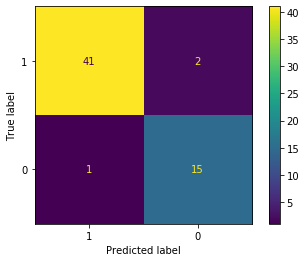

In [64]:
plot_confusion_matrix(stcl1, X_test_scaled, y_test, labels=[1,0], display_labels=[1,0])

### (3) Using Grid Search

Using Grid search 5-fold cross validation to find the best parameters for the Base and Meta classifier

In [65]:
# Using Grid Search
stcl2 = StackingClassifier(classifiers=[logit, svm, knn], meta_classifier=dtcl) 
params = {'logisticregression__C': [1.0, 2.0],
          'svc__C': [1, 10],
          'kneighborsclassifier__n_neighbors': [3, 5],
          'meta_classifier__max_depth': [3, 4]}
grid = GridSearchCV(estimator=stcl2, param_grid=params, cv=5, refit=True)

In [66]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(average_probas=False,
                                          classifiers=[LogisticRegression(C=1.0,
                                                                          class_weight=None,
                                                                          dual=False,
                                                                          fit_intercept=True,
                                                                          intercept_scaling=1,
                                                                          l1_ratio=None,
                                                                          max_iter=100,
                                                                          multi_class='auto',
                                                                          n_jobs=None,
                                                                          penalty='l2',
     

In [67]:
print('Best Parameters: %s' % grid.best_params_ )
print('Best Accuracy: %.2f'% grid.best_score_)

Best Parameters: {'kneighborsclassifier__n_neighbors': 5, 'logisticregression__C': 1.0, 'meta_classifier__max_depth': 3, 'svc__C': 1}
Best Accuracy: 0.92


In [68]:
y_pred_grid = grid.predict(X_test_scaled)

In [69]:
print('Metaclassifier Training Accuracy:',grid.score(X_train_scaled, y_train)*100, '%')
cm_grid = confusion_matrix(y_test, y_pred_grid, labels=[1,0])
print('Confusion Matrix \n', cm_grid)
print('Metaclassifier Testing Accuracy:',grid.score(X_test_scaled, y_test)*100, '%')

Metaclassifier Training Accuracy: 94.11764705882352 %
Confusion Matrix 
 [[40  3]
 [ 5 11]]
Metaclassifier Testing Accuracy: 86.4406779661017 %


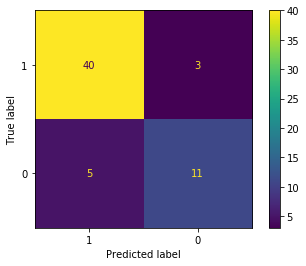

In [70]:
plot_confusion_matrix(grid, X_test_scaled, y_test, labels=[1,0], display_labels=[1,0])

## Result:
Among the various ways of Stacking tested here, using probability values as meta-features gives the best accuracy of 94.91 %

# 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)

## (1) Ensemble Model - Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=3, random_state=2)
rfcl.fit(X_train_scaled, y_train)
y_pred_rfcl = rfcl.predict(X_test_scaled)

C:\Users\amenaria\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [72]:
print('Random Forest Training Accuracy:',rfcl.score(X_train_scaled, y_train)*100, '%')
cm_rfcl = confusion_matrix(y_test, y_pred_rfcl, labels=[1,0])
print('Confusion Matrix \n', cm_rfcl)
print('Random Forest Testing Accuracy:',rfcl.score(X_test_scaled, y_test)*100, '%')

Random Forest Training Accuracy: 93.38235294117648 %
Confusion Matrix 
 [[43  0]
 [ 5 11]]
Random Forest Testing Accuracy: 91.52542372881356 %


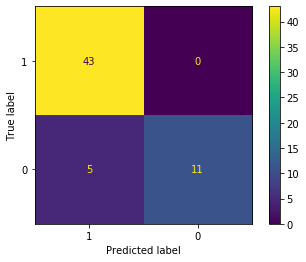

In [73]:
plot_confusion_matrix(rfcl, X_test_scaled, y_test, labels=[1,0], display_labels=[1,0])

## (2) Ensemble Model - XGBoost
Trying the Extream Gradient Boosting model with max depth of 2, n_estimators=50 and learning rate of 0.1

In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=2, random_state=1, n_estimators=50, learning_rate=0.1)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
y_pred_xgb = xgb.predict(X_test_scaled)
print('XGBoost Training Accuracy:',xgb.score(X_train_scaled, y_train)*100, '%')
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=[1,0])
print('Confusion Matrix \n', cm_xgb)
print('XGBoost Testing Accuracy:',xgb.score(X_test_scaled, y_test)*100, '%')

XGBoost Training Accuracy: 97.79411764705883 %
Confusion Matrix 
 [[41  2]
 [ 3 13]]
XGBoost Testing Accuracy: 91.52542372881356 %


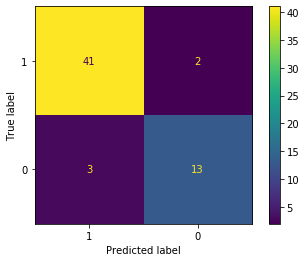

In [76]:
plot_confusion_matrix(xgb, X_test_scaled, y_test, labels=[1,0], display_labels=[1,0])

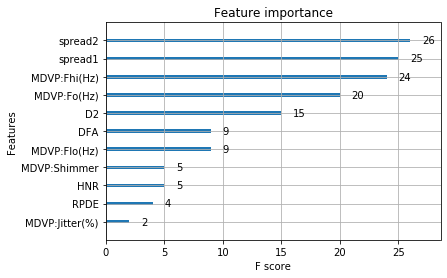

In [77]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

# 9. Compare all the models (minimum 5) and pick the best one among them (10 points)

## Conclusion

### (1) Base Models
- Comparing just the base models - Logistic Regression, SVM, KNN. 
- <b>Logistic regression</b> performs the best with <b>89.83% accuracy</b>.

### (2) Ensemble Techniques - Bagging and Boosting
- Using Ensemble techniques the model accuracy can be improved considerably. Both Bagging and Boosting classifiers show the same improvement for this dataset
    - <b>Random Forest</b>(a type of Bagging classifier) gives <b>91.52% accuracy</b> on Test data.
    - <b>XGBoost</b>(a type of Boosting classifier) also gives <b>91.52% accuracy</b> on Test data.
    - However, precision and recall values are different for both.

### (3) Ensemble Tecniques - Stacking 
- The accuracy can be further increased by using <b>Stacking Classifiers</b>.
    - Here where we are stacking 3 different base models (Logistic Regression, Support Vector Machine and K-Nearest Neighbor) using a Meta-classifier(Decision Trees in this case)
    - Among the various techniques of stacking demonstrated, the best accuracy scores are obtanined by <b>using probability values as meta-features</b>. 
    - It gives an <b>accuracy of 94.91 %</b> on the Test data.
    
## Best model: Stacking Classifier using probability values as meta-features